# HELP

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/code?datasetId=4458&sortBy=voteCount

https://docs.google.com/document/d/1Z_1RtEQhMWUZQPId-OYfKgjMxK29hlFQ2VTqLYdSfEM/edit#heading=h.pkw5nbj9b9h6

https://www.kaggle.com/code/madhurisivalenka/basic-machine-learning-with-red-wine-quality-data

https://www.kaggle.com/code/sisharaneranjana/what-makes-great-wine-great

https://www.kaggle.com/code/sisharaneranjana/advanced-analysis-with-resampling/notebook

On peut supprimer les outliers ayant des valeurs très aberrantes (souventes les extrêmes à droite) des variables continues.

cf : 
https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

https://www.kaggle.com/code/vishalyo990/prediction-of-quality-of-wine

# Librairies

In [1]:
#Importing/Loading required Libraries:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#print actual path to the repertory
import os
os.getcwd()

'/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/Wine Quality Project'

# 1- Familiarization with the dataset

## 1.1- Data loading

In [3]:
df_red = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/Wine Quality Project/data/winequality-red.csv', sep=';')
df_white = pd.read_csv('/Users/pierreloviton/PycharmProjects/data-science/ISEP/Data Analysis/Wine Quality Project/data/winequality-white.csv',sep=';')

In [4]:
df_red['type'] = 'red'
df_white['type'] = 'white'

## 1.2- Concatenation

In [5]:
df_red['type'] = 'red'
df_white['type'] = 'white'
df = pd.concat([df_red,df_white], ignore_index = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## 1.3- Data information and describtion

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


We can see that there is 13 different features. 

The 'quality' feature is discrete (integer).

The 'type' variable is a categorical variable, binary, so we have to fix it and to transform it into a discrete variable.

The other eleven features are continuous (float).

In [79]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Describtion of the features

<AxesSubplot:title={'center':'Unique values per feature'}>

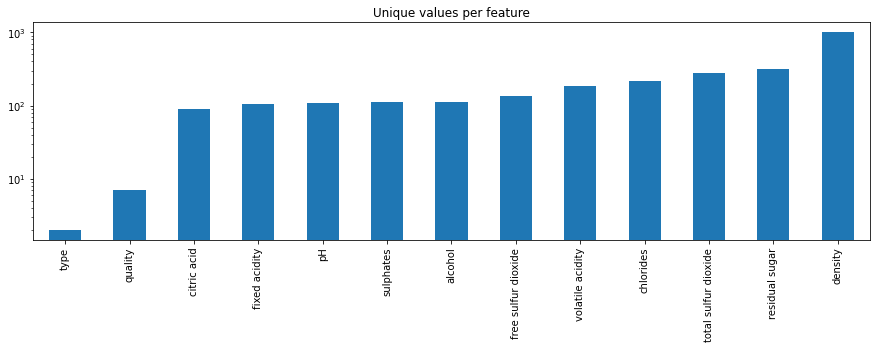

In [92]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(
  include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),title = 'Unique values per feature')

# 2- Data analysis

## 2.1- Distribution (continuous variables)

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

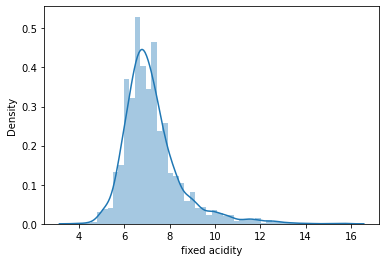

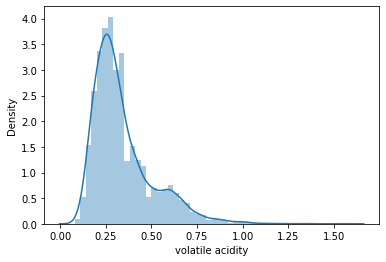

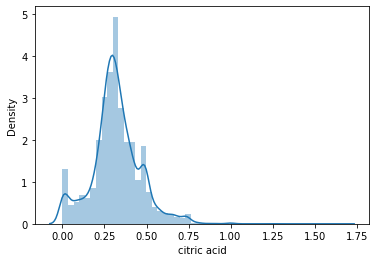

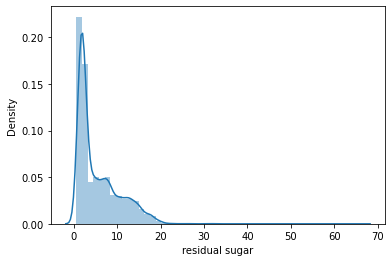

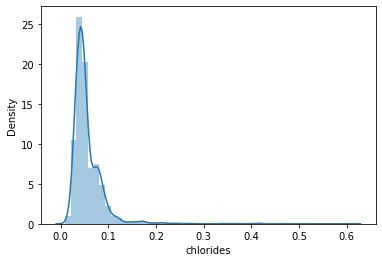

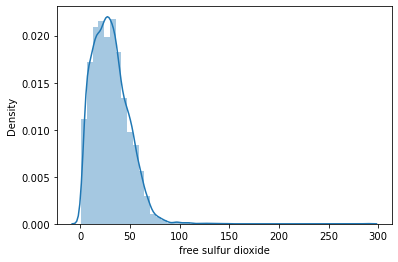

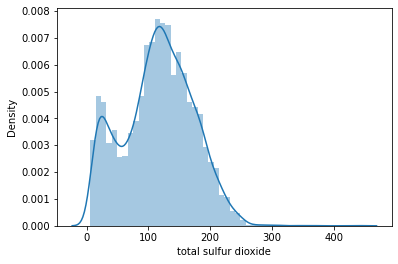

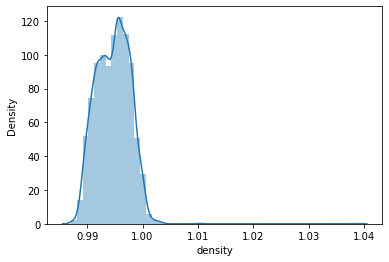

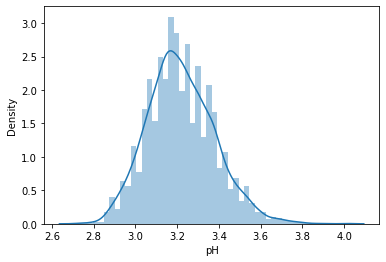

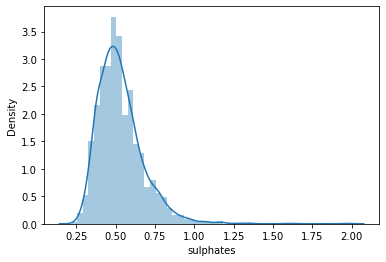

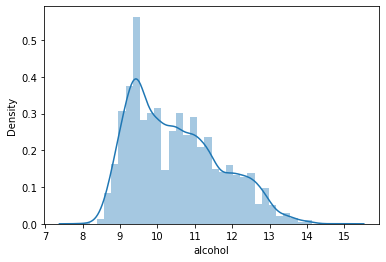

In [108]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

## 2.2 Repartition (discrete variables)

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


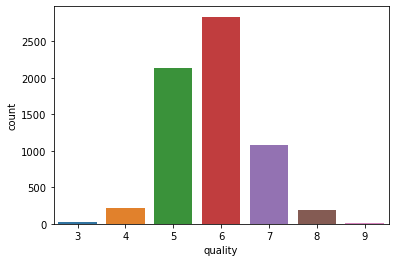

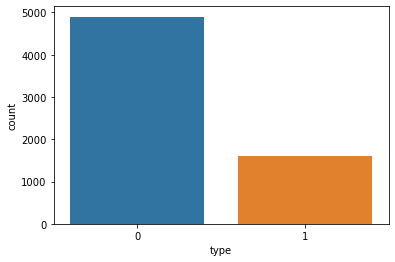

In [111]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.countplot(df[col])

## 2.3- Type of wine/Variables Relationship

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

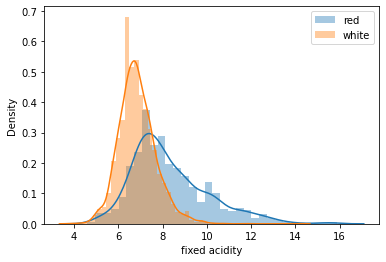

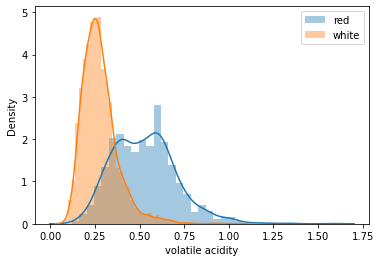

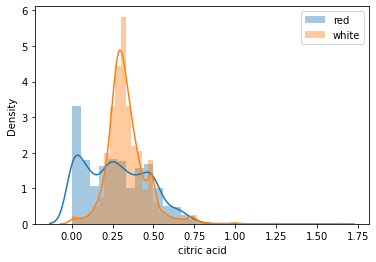

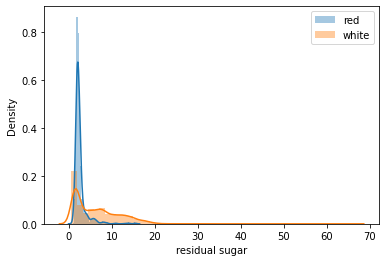

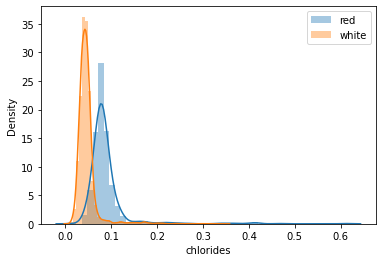

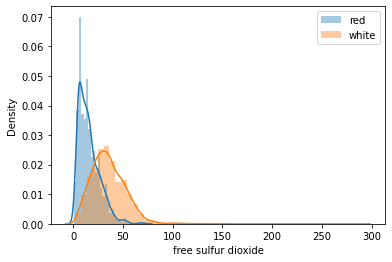

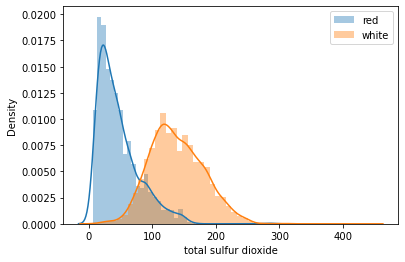

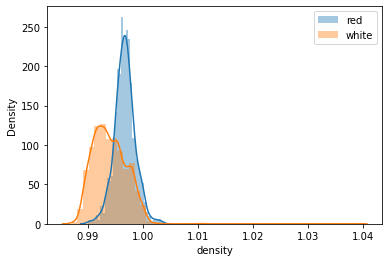

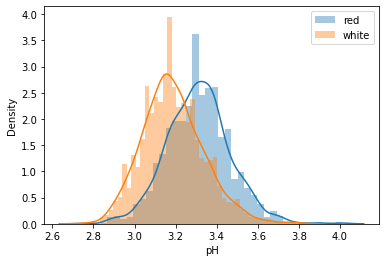

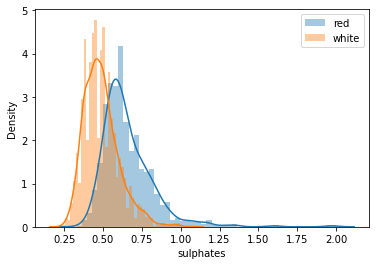

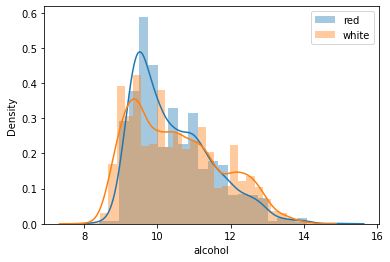

In [134]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_red[col], label = 'red')
    sns.distplot(df_white[col], label = 'white')
    plt.legend()

## 2.4- Target/Variables Relationship 

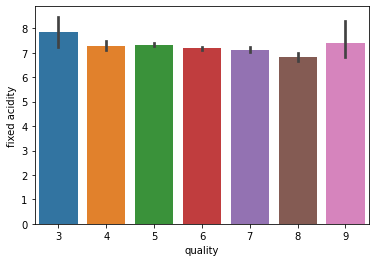

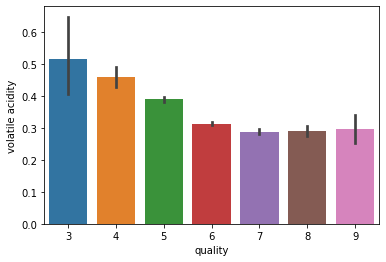

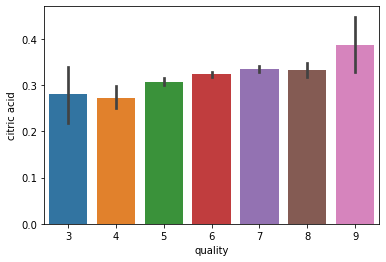

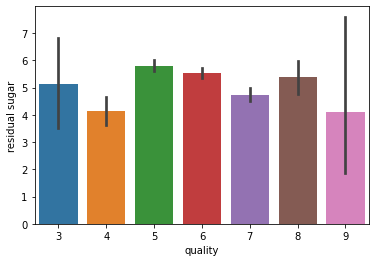

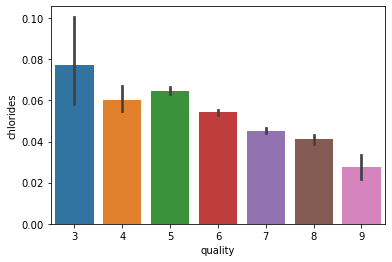

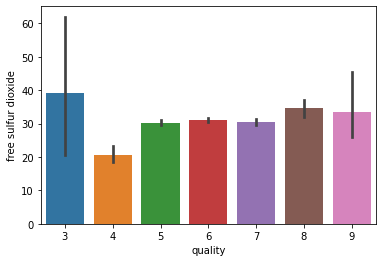

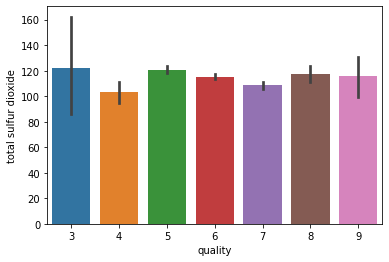

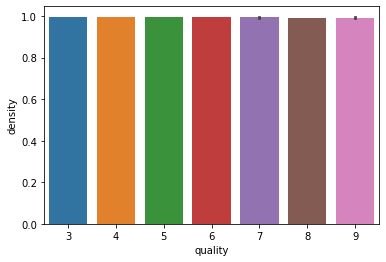

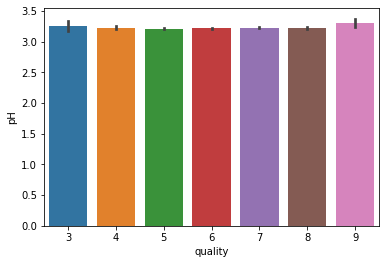

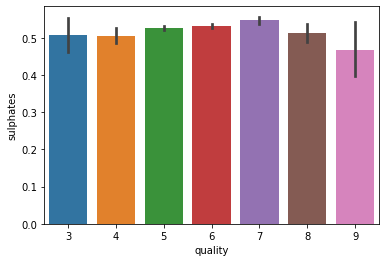

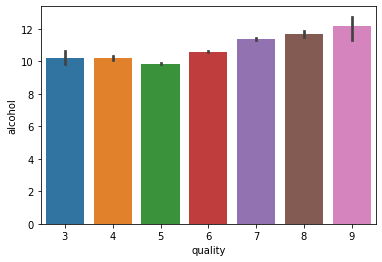

In [148]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.barplot(x = df['quality'], y = df[col])


<AxesSubplot:xlabel='quality', ylabel='count'>

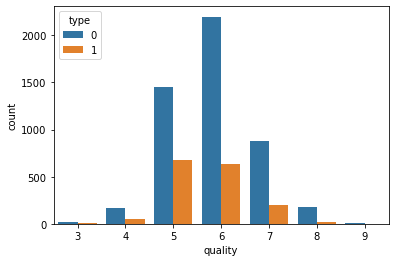

In [142]:
sns.countplot(x=df['quality'],hue=df['type'])

In [147]:
print("The mean quality score of red wine is", df_red.quality.mean())
print("The mean quality score of white wine is", df_white.quality.mean())

The mean quality score of red wine is 5.6360225140712945
The mean quality score of white wine is 5.87790935075541


As we can see on the graph, and then with the mean, white wines have better average quality score than red wines.

## 2.6- Correlation

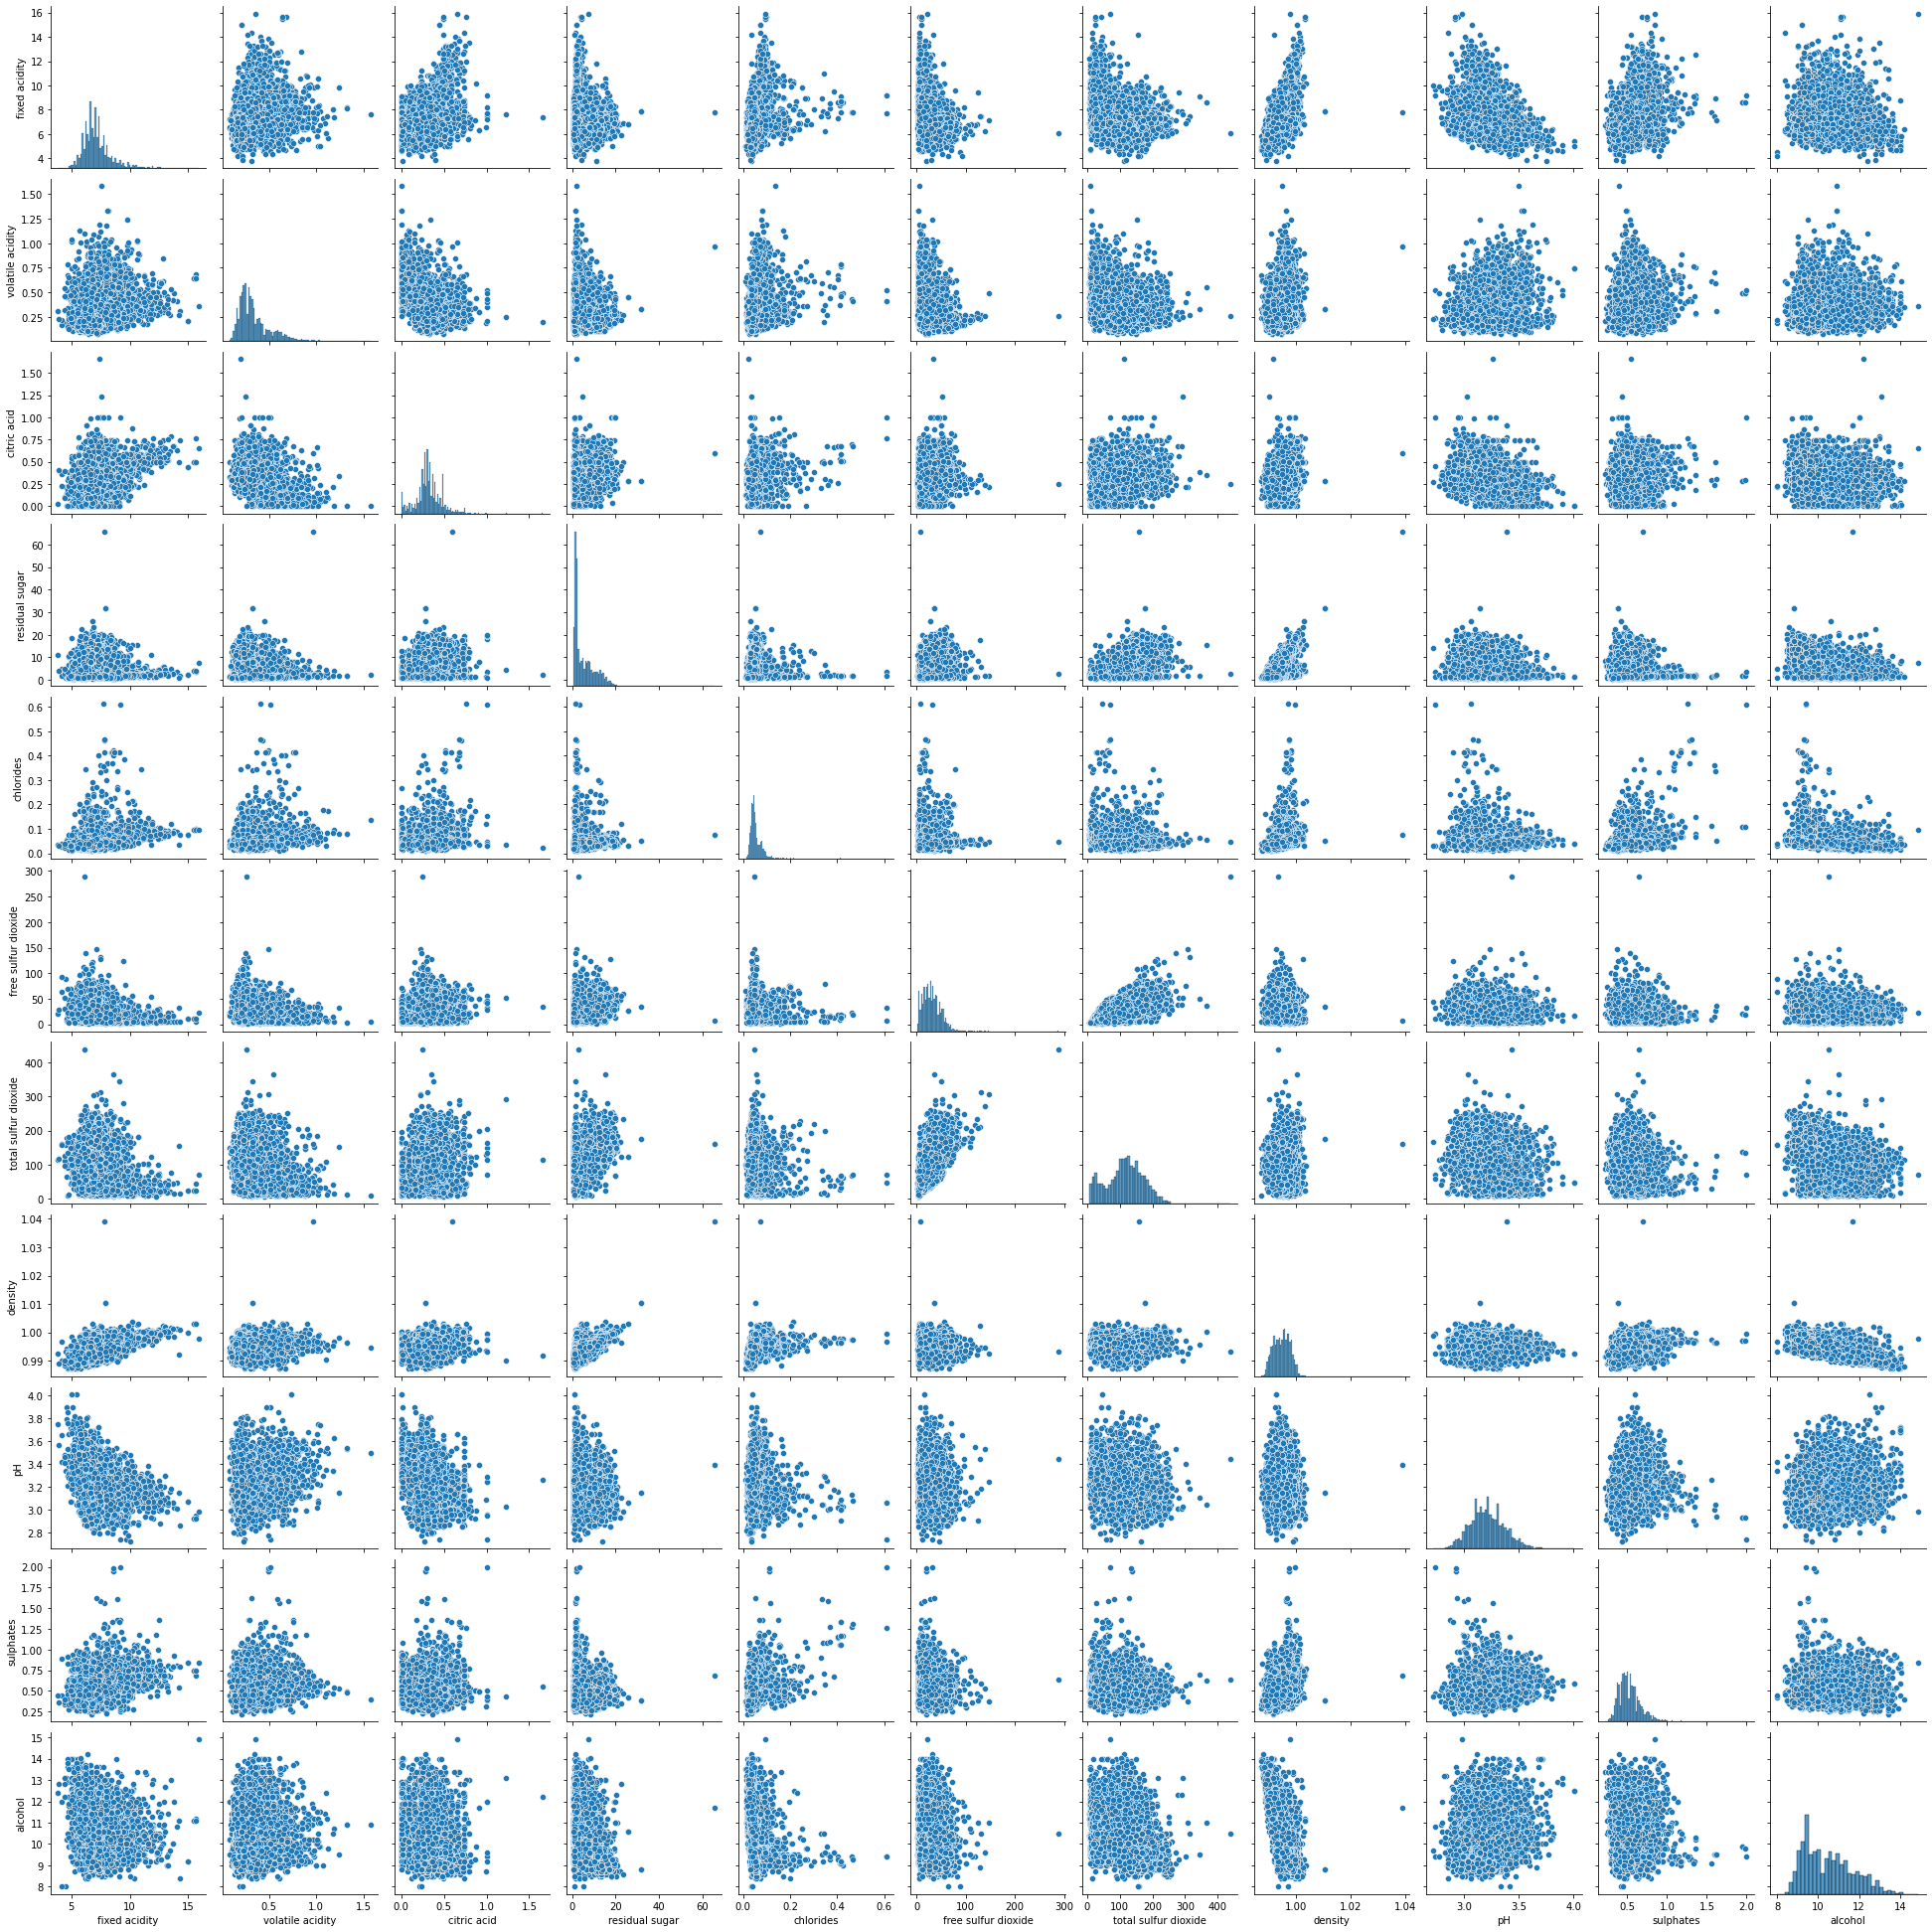

In [165]:
sns.pairplot(df.select_dtypes('float'))

<AxesSubplot:>

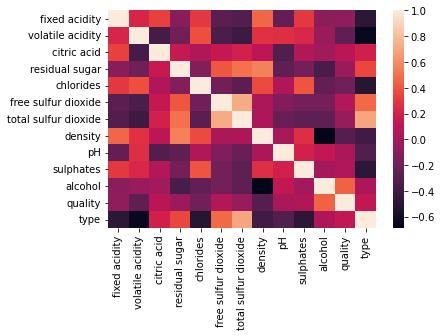

In [39]:
sns.heatmap(df.corr())

In [166]:
#count of each target variable
from collections import Counter
Counter(df['quality'])

Counter({5: 2138, 6: 2836, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})

In [167]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

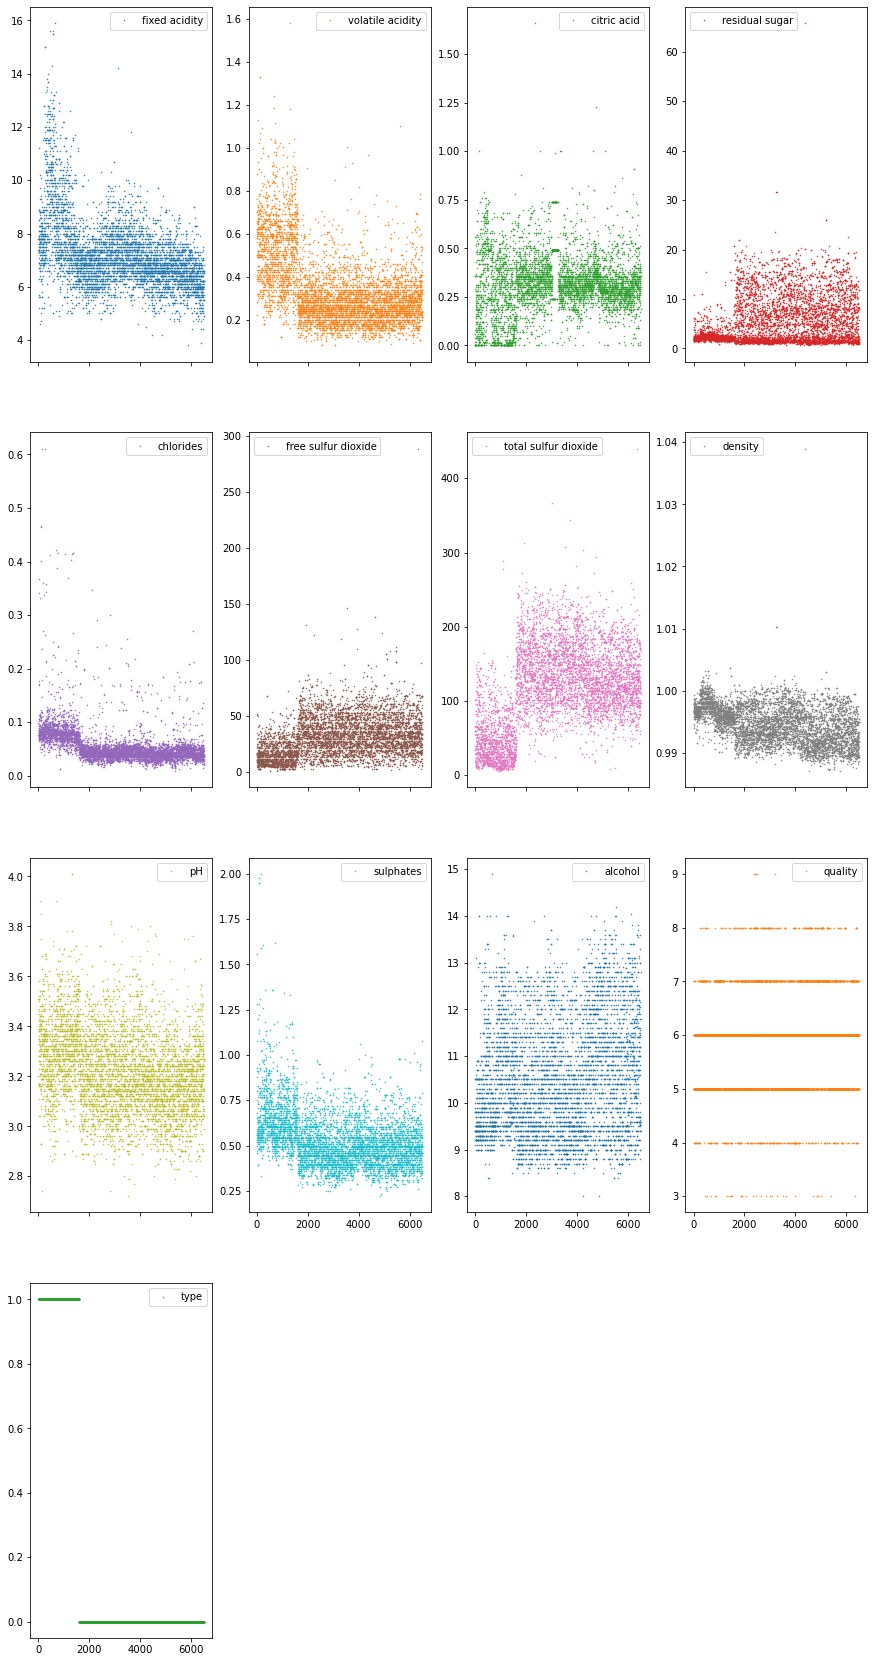

In [94]:
df.plot(lw=0,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(15, 30),
          markersize=1)

# 3- Preprocessing

## 3.1- Missing value

In [46]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


We can see that there isn't missing value in our dataset

## 3.2- Categorical features

In [6]:
df.type.loc[df.type == 'red'] = 1
df.type.loc[df.type == 'white'] = 0
df.type = df['type'].astype(int)

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## 3.3- Outliers

Identify outliers and remove them ?

In [89]:
def count_outliers(data,col):
    q1 = data[col].quantile(0.25,interpolation = 'nearest')
    q2 = data[col].quantile(0.5,interpolation = 'nearest')
    q3 = data[col].quantile(0.75,interpolation = 'nearest')
    q4 = data[col].quantile(1,interpolation = 'nearest')
    IQR = q3 - q1
    global LLP
    global ULP
    LLP = q1-1.5*IQR
    ULP = q3+1.5*IQR
    if data[col].min() > LLP and data[col].max() < ULP:
        print("No outlier in",i)
    else:
        print("There are outliers in", i)
        x = data[data[col]<LLP][col].size
        y = data[data[col]>ULP][col].size
        a.append(i)
        print("Count of outliers is:", x+y)
        b.append(x+y)
    print("\nthere is",np.sum(b)-b[-1],'outliers')
global a
a = []
b = []
for i in df.columns:
    count_outliers(df,i)

There are outliers in fixed acidity
Count of outliers is: 357

there is 0 outliers
There are outliers in volatile acidity
Count of outliers is: 377

there is 357 outliers
There are outliers in citric acid
Count of outliers is: 509

there is 734 outliers
There are outliers in residual sugar
Count of outliers is: 118

there is 1243 outliers
There are outliers in chlorides
Count of outliers is: 286

there is 1361 outliers
There are outliers in free sulfur dioxide
Count of outliers is: 62

there is 1647 outliers
There are outliers in total sulfur dioxide
Count of outliers is: 10

there is 1709 outliers
There are outliers in density
Count of outliers is: 3

there is 1719 outliers
There are outliers in pH
Count of outliers is: 73

there is 1722 outliers
There are outliers in sulphates
Count of outliers is: 191

there is 1795 outliers
There are outliers in alcohol
Count of outliers is: 3

there is 1986 outliers
There are outliers in quality
Count of outliers is: 228

there is 1989 outliers
Th

In [ ]:
# create another grouped boxplot 
sns.boxplot(x = data['day'],
            y = data['total_bill'],
            hue = data['smoker'],
            palette = 'Set2')

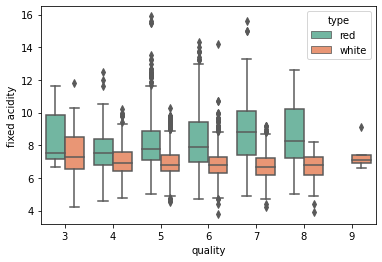

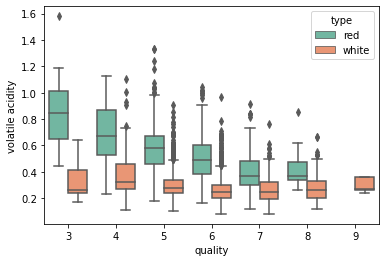

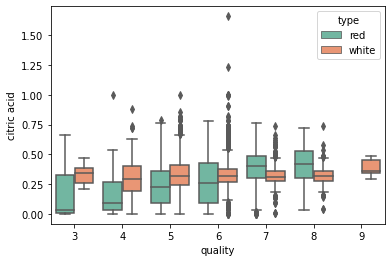

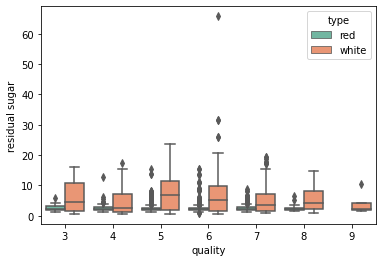

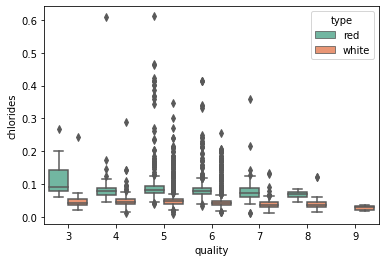

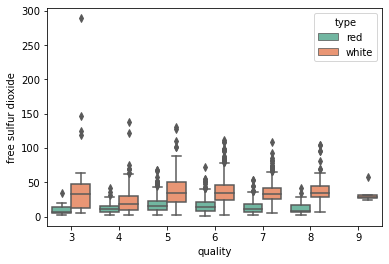

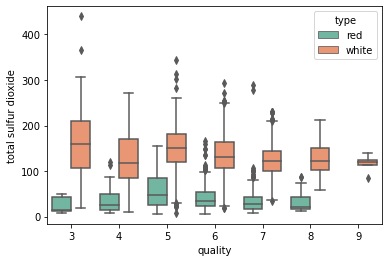

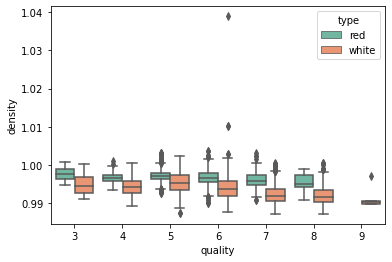

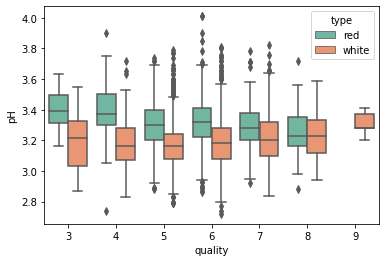

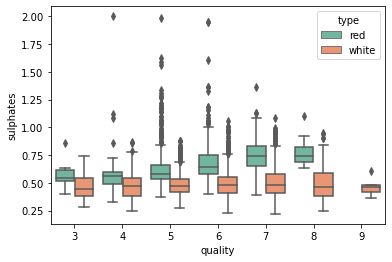

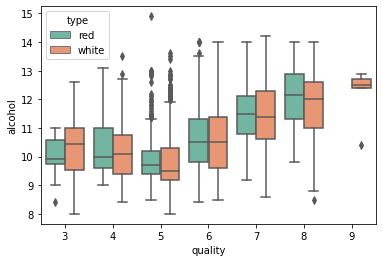

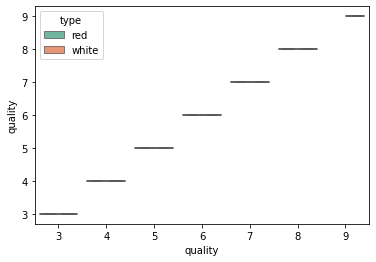

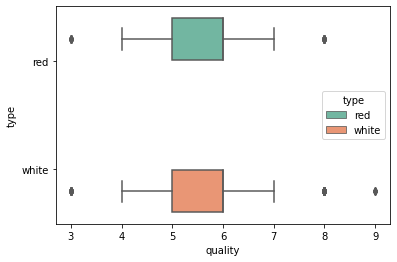

In [8]:
for i in df.columns:
    sns.boxplot(x='quality',y=i,data=df,hue ='type', palette ='Set2')
    plt.xlabel('quality')
    plt.show()

In [100]:
import numpy as np
import scipy.stats as stats

def grubbs_test(x=df['fixed acidity']):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")
grubbs_test()
#grubbs_test(y)

Grubbs Calculated Value: 6.699425498517213
Grubbs Critical Value: 4.470203066686854
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. It is taken as outliers.

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats

#train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
out=[]
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    print(len(out))
ZRscore_outlier(df['citric acid'])

/var/folders/f0/q7nn178n5cldx0lvl6yvbbn40000gn/T/ipykernel_18396/3630951976.py:9: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  ma = stats.median_absolute_deviation(df)


Outliers: [1.0, 0.79, 0.78, 0.88, 1.66, 1.0, 0.81, 0.99, 1.0, 1.0, 0.81, 0.78, 0.79, 0.82, 1.0, 0.8, 0.8, 1.23, 1.0, 0.79, 0.82, 0.86, 0.78, 0.91, 0.91]
25


Suite à l'analyse des outliers, nous avons décidé de les garder dans notre jeu de données. Selon nous, le jeu de données étant déjà propre, il est intéressant de garder ces outliers qui représentent la vraie vie.

## 3.4- Stats Tests

### 3.4.1- Chi-squared test

In [10]:
cross = pd.crosstab(df.quality, df.type)
cross

type,red,white
quality,,
3,10,20
4,53,163
5,681,1457
6,638,2198
7,199,880
8,18,175
9,0,5


In [12]:
from scipy.stats import chi2_contingency
chi2_contingency(cross)

(116.54327959374594,
 8.66434779598271e-23,
 6,
 array([[7.38340773e+00, 2.26165923e+01],
        [5.31605356e+01, 1.62839464e+02],
        [5.26190857e+02, 1.61180914e+03],
        [6.97978144e+02, 2.13802186e+03],
        [2.65556565e+02, 8.13443435e+02],
        [4.74999230e+01, 1.45500077e+02],
        [1.23056795e+00, 3.76943205e+00]]))

### 3.4.2- Cramer's V

In [13]:
import math
cramer = math.sqrt(chi2_contingency(cross)[0]/(df.shape[0]*min((cross.shape[0]-1),(len(cross.columns)-1))))
print(cramer)

0.133932872759777


In [15]:
degre_liberte = (cross.shape[0]-1)*(cross.shape[1]-1)
print(degre_liberte)

6


In [36]:
for i in df.columns:
    for j in df.columns :
        cross = pd.crosstab(df[i], df[j])
        cramer = math.sqrt(chi2_contingency(cross)[0]/(df.shape[0]*min((cross.shape[0]-1),(len(cross.columns)-1))))
        if cramer>0.7:
            if i!=j:
                print('Cramers V =', cramer, 'for',j, 'and his', i)

Cramers V = 0.7009693707485187 for type and his volatile acidity
Cramers V = 0.8436344970456038 for type and his chlorides
Cramers V = 0.8346188229530881 for type and his total sulfur dioxide
Cramers V = 0.7009693707485187 for volatile acidity and his type
Cramers V = 0.8436344970456039 for chlorides and his type
Cramers V = 0.8346188229530881 for total sulfur dioxide and his type


In [21]:
pd.crosstab(df['fixed acidity'], df.type)

type,red,white
fixed acidity,,
3.8,0,1
3.9,0,1
4.2,0,2
4.4,0,3
4.5,0,1
...,...,...
14.3,1,0
15.0,2,0
15.5,2,0


## 3.5- Data normalization

In [37]:
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()
df["type"] = ord_enc.fit_transform(df[["type"]])
df['type']  =df['type'].astype(int)

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
from scipy.stats import shapiro
shapiro(df.quality)[1]

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [118]:
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 4:
        reviews.append('1')
    elif i >= 5 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df['reviews'] = reviews

In [119]:
X = df.drop(['quality','reviews'],axis=1)
y=df.reviews

In [120]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

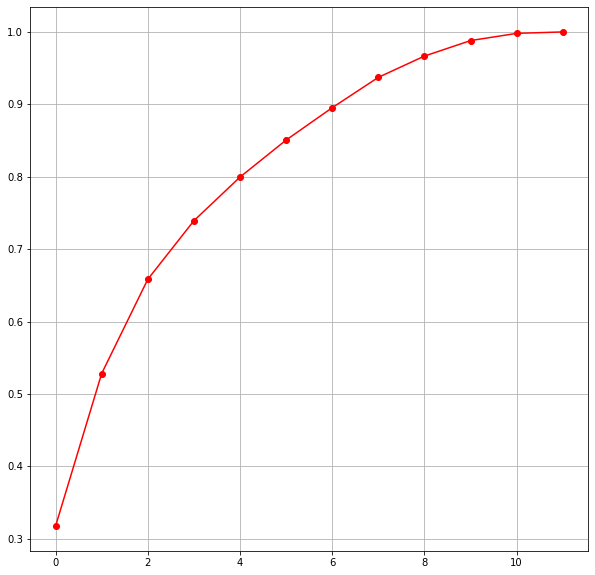

In [42]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [91]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X)
X_new

array([[ 3.73606125, -0.14116701, -2.63917588, ..., -0.23810378,
         0.35492813, -0.48975846],
       [ 3.68227354,  0.56082363, -1.95619094, ...,  1.64893255,
        -0.21111841, -0.4692133 ],
       [ 3.66368602,  0.32778184, -1.65508966, ...,  0.82024467,
        -0.2391109 , -0.41243678],
       ...,
       [-0.90178164, -0.62769604,  0.08320398, ..., -0.53874544,
        -0.7109638 , -1.25675588],
       [-0.9152328 , -3.4741706 ,  0.08292788, ..., -0.11640123,
         0.30304161,  0.68615105],
       [-1.19228932, -2.75002049,  0.6755477 , ..., -0.74652771,
         0.56991401,  0.29893372]])

In [154]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

oversample = SMOTE()
X_train1,X_test,y_train1,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train, y_train = oversample.fit_resample(X_train1, y_train1)

/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reviews', ylabel='count'>

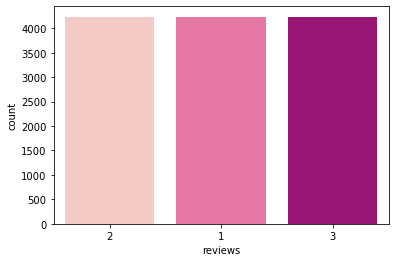

In [122]:
sns.countplot(y_train,palette='RdPu')

# 4. ML Model / Cluster / Classification,...

Depending on the type of data sets, you will have to either try to find interesting
structures and clusters in the data, or to highlight strong links between the variables,
build models allowing to detect the different classes in your data set, or building
predictive models from your data.

## 4.1. Logistic Regression

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

print("Size of Dataset {}".format(len(X_new)))
logreg=LogisticRegression()
#X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=0)
logreg.fit(X_train,y_train)
predict=logreg.predict(X_test)
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 6497
Accuracy score on training set is 0.636292099464904
Accuracy score on test set is 0.48256410256410254


In [137]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, predict)
lr_acc_score = accuracy_score(y_test, predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[ 50  21   5]
 [425 847 545]
 [  2  11  44]]
48.256410256410255


In [138]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))


              precision    recall  f1-score   support

           1       0.10      0.66      0.18        76
           2       0.96      0.47      0.63      1817
           3       0.07      0.77      0.14        57

    accuracy                           0.48      1950
   macro avg       0.38      0.63      0.31      1950
weighted avg       0.90      0.48      0.60      1950



In [139]:
y_train.value_counts()

2    4236
1    4236
3    4236
Name: reviews, dtype: int64

In [140]:
y_test.value_counts()

2    1817
1      76
3      57
Name: reviews, dtype: int64

In [141]:
pd.DataFrame(predict).value_counts()

2    879
3    594
1    477
dtype: int64

## 4.2. Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [143]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
print(dt_conf_matrix)
print("Accuracy score on training set is {}".format(accuracy_score(dt.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(dt_predict,y_test)))

[[  25   50    1]
 [ 131 1564  122]
 [   3   19   35]]
Accuracy score on training set is 1.0
Accuracy score on test set is 0.8328205128205128


In [144]:
pd.DataFrame(dt_predict).value_counts()

2    1633
1     159
3     158
dtype: int64

## 4.3. Naive Bayes

In [145]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

In [146]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
print(nb_conf_matrix)
print("Accuracy score on training set is {}".format(accuracy_score(nb.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(nb_predict,y_test)))

[[ 36  15  25]
 [416 608 793]
 [  3   7  47]]
Accuracy score on training set is 0.5539030531948379
Accuracy score on test set is 0.35435897435897434


In [147]:
pd.DataFrame(nb_predict).value_counts()

3    865
2    630
1    455
dtype: int64

## 4.4. Random Forest

### 4.4.1- Without PCA

In [173]:
# from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =100)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [174]:
#print confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
print(rf_conf_matrix)
print("Accuracy score on training set is {}".format(accuracy_score(rf.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(rf_predict,y_test)))

[[  23   53    0]
 [  47 1717   53]
 [   0   27   30]]
Accuracy score on training set is 1.0
Accuracy score on test set is 0.9076923076923077


In [175]:
pd.DataFrame(rf_predict).value_counts()

2    1797
3      83
1      70
dtype: int64

In [176]:
y_test.value_counts()

2    1817
1      76
3      57
Name: reviews, dtype: int64

### 4.4.2- PCA with n_components = 8

In [152]:
# from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =100)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [153]:
#print confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
print(rf_conf_matrix)
print("Accuracy score on training set is {}".format(accuracy_score(rf.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(rf_predict,y_test)))

[[  26   50    0]
 [  65 1682   70]
 [   0   29   28]]
Accuracy score on training set is 1.0
Accuracy score on test set is 0.8902564102564102


On peut voir que la réduction de dimensionalité ici n'est pas très utile, donc on n'utilisera pas de PCA.

## 4.5. KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier
#we shall use the rbf kernel first and check the accuracy
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh_predict=neigh.predict(X_test)

In [156]:
#print confusion matrix and accuracy score
neigh_conf_matrix = confusion_matrix(y_test, neigh_predict)
print(neigh_conf_matrix)
print("Accuracy score on training set is {}".format(accuracy_score(neigh.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(neigh_predict,y_test)))

[[  34   38    4]
 [ 171 1494  152]
 [   2   18   37]]
Accuracy score on training set is 0.9678942398489141
Accuracy score on test set is 0.8025641025641026


In [157]:
pd.DataFrame(neigh_predict).value_counts()

2    1550
1     207
3     193
dtype: int64

## 4.6. Hyperparameter tuning

In [126]:
from sklearn.model_selection import GridSearchCV


# Define Parameters
max_depth=[2, 8,10, 16]
n_estimators = [64,100, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.61882301 0.62086843 0.62102594 0.62118314 0.88542639 0.88747171
 0.88684241 0.88692096 0.92618792 0.92862753 0.92917797 0.92917837
 0.96443228 0.96506106 0.96616289 0.96545445], using {'max_depth': 16, 'n_estimators': 128}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.422722,0.013916,0.019789,0.001051,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.612510,0.619984,0.621164,0.615899,0.624557,0.618823,0.004198,16
1,0.623141,0.010577,0.028090,0.001878,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.615264,0.621558,0.629819,0.622983,0.614719,0.620868,0.005555,15
2,0.777750,0.008361,0.033815,0.000773,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.610936,0.617624,0.636900,0.621409,0.618261,0.621026,0.008639,14
3,1.597979,0.068586,0.066835,0.003193,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.612116,0.621951,0.634146,0.620228,0.617473,0.621183,0.007287,13
4,1.089855,0.015792,0.029240,0.001758,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.881589,0.893391,0.882769,0.880756,0.888627,0.885426,0.004843,12
5,1.742736,0.072242,0.044133,0.002584,8,100,"{'max_depth': 8, 'n_estimators': 100}",0.888277,0.894965,0.888670,0.883510,0.881936,0.887472,0.004573,9
6,2.082823,0.043725,0.052192,0.000321,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.885523,0.897325,0.884343,0.883117,0.883904,0.886842,0.005299,11
7,4.179489,0.050931,0.103451,0.002874,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.886310,0.897325,0.885523,0.882723,0.882723,0.886921,0.005400,10
8,1.238824,0.024524,0.030298,0.000216,10,64,"{'max_depth': 10, 'n_estimators': 64}",0.925256,0.934697,0.922502,0.923259,0.925226,0.926188,0.004390,8
9,1.906126,0.010228,0.046589,0.000834,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.926829,0.934304,0.926042,0.926013,0.929949,0.928628,0.003185,7


In [168]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 16, n_estimators= 128)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [169]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
print(rf_conf_matrix)
print("Accuracy score on training set is {}".format(accuracy_score(rf.predict(X_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(rf_predict,y_test)))

[[  23   53    0]
 [  52 1671   94]
 [   0   25   32]]
Accuracy score on training set is 0.9944129682090022
Accuracy score on test set is 0.8851282051282051


In [170]:
pd.DataFrame(rf_predict).value_counts()

2    1749
3     126
1      75
dtype: int64

In [171]:
y_test.value_counts()

2    1817
1      76
3      57
Name: reviews, dtype: int64

In [172]:
y_train1.value_counts()

2    4236
1     170
3     141
Name: reviews, dtype: int64

Nous préférons utiliser un RandomForest avec ses paramètres par défaut, car il répartit mieux les variables 1 et 3 que le RandomForest avec les hyperparamètres obtenus avec le GridSearchCV.

## 4.7- Features importance

In [86]:
columns_X = []
for i in df.columns:
    if i!= 'quality':
        if i != 'reviews':
            columns_X.append(i)
    

    Feature Importance          Feature Name
10            0.172982               alcohol
5             0.118024   free sulfur dioxide
1             0.094135      volatile acidity
7             0.084245               density
6             0.081249  total sulfur dioxide
4             0.079805             chlorides
2             0.079678           citric acid
9             0.074670             sulphates
3             0.074109        residual sugar
0             0.066386         fixed acidity
8             0.064543                    pH
11            0.010173                  type


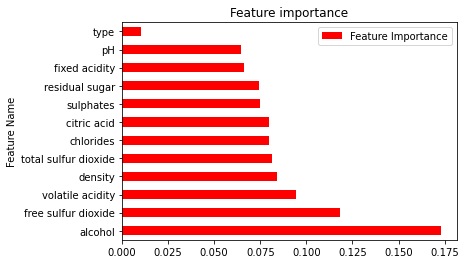

In [177]:
def display_feat_imp_rforest(rforest):
  feat_imp = rforest.feature_importances_
  df_featimp = pd.DataFrame(feat_imp, columns = {"Feature Importance"})
  df_featimp["Feature Name"] = columns_X
  df_featimp = df_featimp.sort_values(by="Feature Importance", ascending=False)
  print(df_featimp)
  df_featimp.plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="red")
 
display_feat_imp_rforest(rf)

In [180]:
df2_red = df_red.groupby('quality').agg({'alcohol':'mean','free sulfur dioxide':'mean', 
                                   'volatile acidity':'mean', 
                                   'density':'mean',
                                   'chlorides':'mean', 
                                   'total sulfur dioxide':'mean', 
                                   'sulphates':'mean', 
                                   'citric acid':'mean', 
                                   'residual sugar':'mean',
                             })
df2_red.loc[df2_red.index==8]


,alcohol,free sulfur dioxide,volatile acidity,density,chlorides,total sulfur dioxide,sulphates,citric acid,residual sugar
quality,,,,,,,,,
8,12.094444,13.277778,0.423333,0.995212,0.068444,33.444444,0.767778,0.391111,2.577778


In [181]:
df2_red.loc[df2_red.index==3]

,alcohol,free sulfur dioxide,volatile acidity,density,chlorides,total sulfur dioxide,sulphates,citric acid,residual sugar
quality,,,,,,,,,
3,9.955,11.0,0.8845,0.997464,0.1225,24.9,0.57,0.171,2.635


Voici les caractéristiques que pourrait avoir notre vin rouge parfait, et notre vin rouge le moins bon.


In [191]:
df2_white = df_white.groupby('quality').agg({'alcohol':'mean','free sulfur dioxide':'mean', 
                                   'volatile acidity':'mean', 
                                   'density':'mean',
                                   'chlorides':'mean', 
                                   'total sulfur dioxide':'mean', 
                                   'sulphates':'mean', 
                                   'citric acid':'mean', 
                                   'fixed acidity':'mean',
                             })
df2_white.loc[df2_white.index==9]

,alcohol,free sulfur dioxide,volatile acidity,density,chlorides,total sulfur dioxide,sulphates,citric acid,fixed acidity
quality,,,,,,,,,
9,12.18,33.4,0.298,0.99146,0.0274,116.0,0.466,0.386,7.42


In [192]:
df2_white.loc[df2_white.index==3]

,alcohol,free sulfur dioxide,volatile acidity,density,chlorides,total sulfur dioxide,sulphates,citric acid,fixed acidity
quality,,,,,,,,,
3,10.345,53.325,0.33325,0.994884,0.0543,170.6,0.4745,0.336,7.6


Voici les caractéristiques que pourrait avoir notre vin blanc parfait, et notre vin blanc le moins bon.